<h2>Suggested Libraries:</h2>

In [1]:
!pip install opencv-python
!pip install sklearn

<h2>Dealing with Video:</h2>

In [1]:
import numpy as np
import cv2
import IPython

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/Users/orcun/Desktop/Media-Informatics/MRS/Assignments/Assignment3/11716448-orcun-ilker-doger/.venv/bin/python"
  * The NumPy version is: "1.23.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: No module named 'numpy.core._multiarray_umath'


In [3]:
#use this method to easily display images within your notebook
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

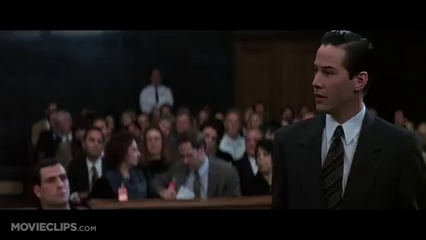

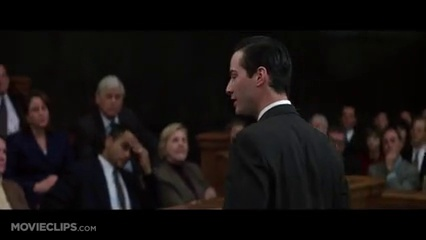

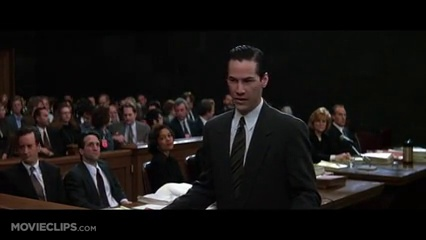

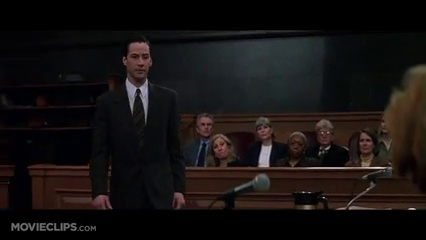

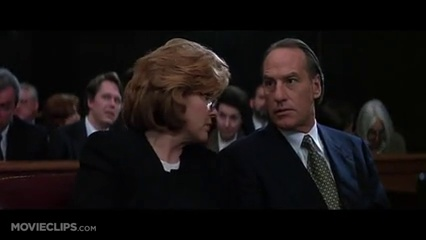

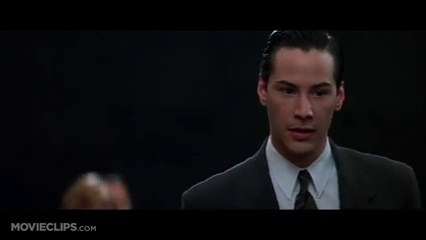

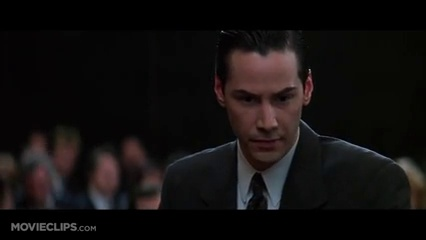

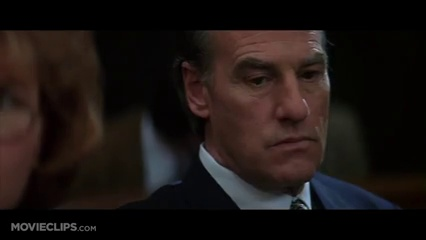

In [4]:
cap = cv2.VideoCapture('../videos/DevSet/01_DevilsAdvocate_03.mp4')

#variable to keep track over frame numbers
frame_count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    
    #show every 200th frame
    if ret and not frame_count % 200: 
        imshow(frame)

    #do computation on frame...
        
    frame_count += 1
    
    
cap.release()


Keep in mind that your frame numbers might differ from the frame numbers provided in the ground truth txt-files by a certain offset. Make sure to mitigate this by manually adding / subtracting that offset.
<p>
We can also extract frames by their specific number, which is a more robust solution. Note, though, that frame numbers might still differ from the ground-truth.

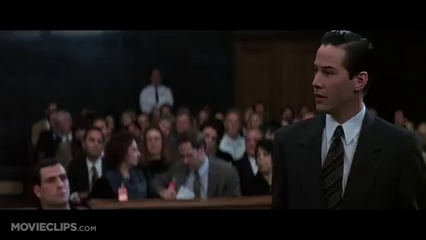

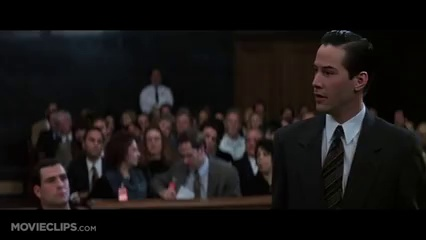

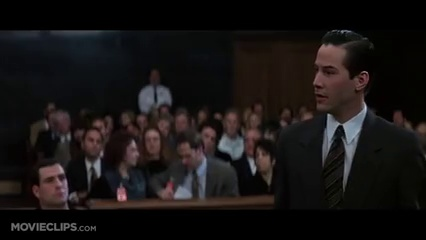

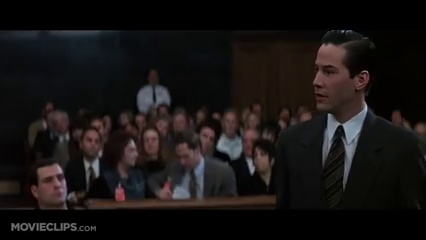

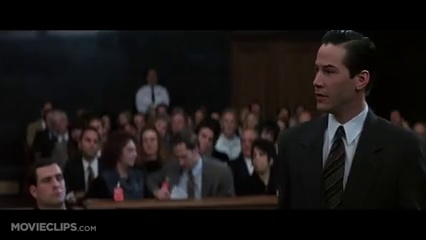

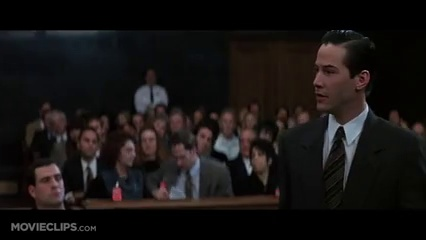

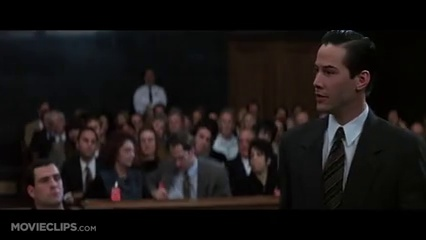

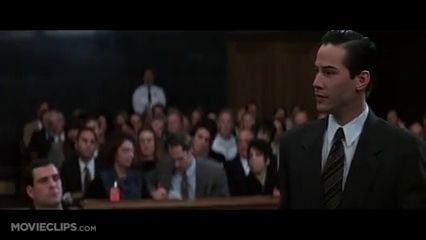

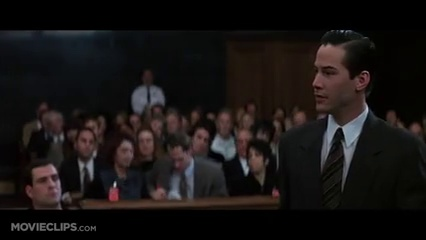

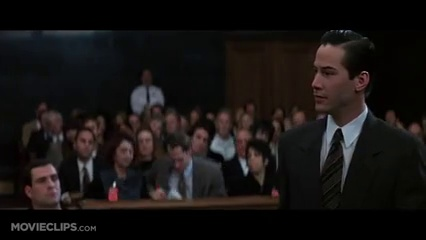

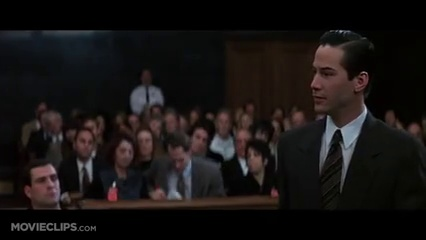

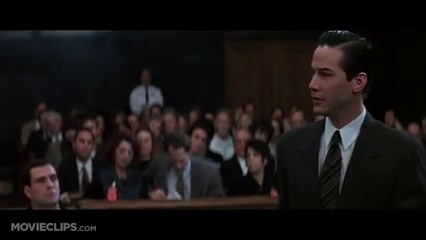

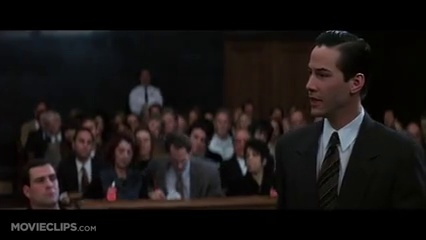

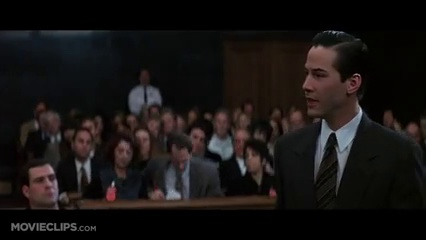

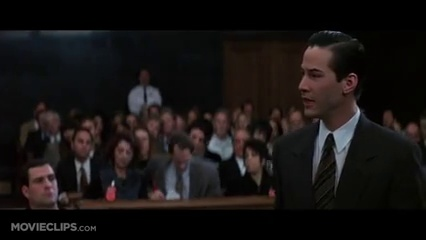

In [15]:
cap = cv2.VideoCapture('../videos/DevSet/01_DevilsAdvocate_03.mp4')

#display first 15 frames of video file
for i in np.arange(15):
    cap.set(1, i)
    ret, frame = cap.read()
    if ret: 
        imshow(frame)

You can easily play a video file inside your Notebook as well:

In [16]:
from IPython.display import Video

Video('../videos/DevSet/01_DevilsAdvocate_03.mp4')

<h2>Extracting Features</h2>
<p>
Once you have a frame, OpenCV offers many easy to use methods to extract different features from them. You can find most of them listed here: <a href>https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html</a>
<p>
Histogram-Example:

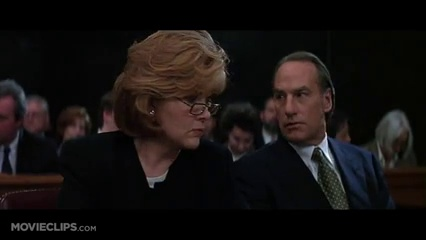

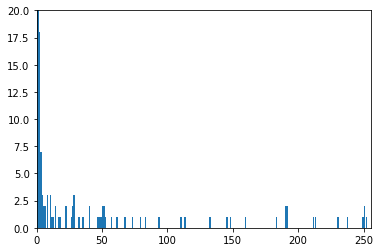

In [74]:
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('../videos/DevSet/01_DevilsAdvocate_03.mp4')

#get 250th frame
cap.set(1, 750)
ret, frame = cap.read()
imshow(frame)


hist = cv2.calcHist([frame],[2],None,[256],[0,256])
plt.xlim([0,256])
plt.ylim([0,20])

plt.hist(hist,256,[0,256]); plt.show()

<h2> K-Means Clustering </h2>
<p>
In one of the assignments you will be asked to use K-means clustering to group different movie genres. For this, you may use the K-means functionality provided by the <b>Scikit-learn</b> library. 

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#this is the data we want to determine cluster for via k-means
X = [[1],[2],[8],[9],[17],[18],[19]]

#say we want 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(np.reshape(X, (-1,1)))

#print out the assigned cluster for each entered value
print(kmeans.labels_)

#this is the data we want to predict the clusters for
Y = [[1],[10],[20]]

#run prediction
pred_y = kmeans.predict(np.reshape(Y, (-1,1)))

#print out predicted labels, compare them to the original labels to find correlation
print(pred_y)


[1 1 2 2 0 0 0]
[1 2 0]
